# Нелинейный метод наименьших квадратов. Ланцош

> Выполнил: Власов Максим Сергеевич, студент группы 3822М1ПМкн

## Условие задачи

[Ланцош <<Прикладные методы анализа>>]

Данные, представленные в таблице, нанесите на график.

```
       x         f(x)    
 ----------------------
    2.5134       0    
    2.0443       0.05
    1.6684       0.10
    1.3664       0.15
    1.1232       0.20
    0.9269       0.25
    0.7679       0.30
    0.6389       0.35
    0.5338       0.40
    0.4479       0.45
    0.3776       0.50
    0.3197       0.55
    0.2720       0.60
    0.2325       0.65
    0.1997       0.70
    0.1723       0.75
    0.1493       0.80
    0.1301       0.85
    0.1138       0.90
    0.1000       0.95
    0.0883       1.00
    0.0783       1.05
    0.0698       1.10
    0.0624       1.15
```

Нелинейным методом наименьших квадратов аппроксимируйте данные моделью в виде суммы 3 экспонент
$$
f(x) = \beta_1 e^{-\lambda_1 x} + \beta_2 e^{-\lambda_2 x} + \beta_3 e^{-\lambda_3 x}
$$

Рассмотрите различные начальные приближения к $\beta_1, \beta_2, \beta_3, \lambda_1, \lambda_2, \lambda_3$.
Чему равна результирующая суммарная ошибка? Насколько чувствительны результирующие значения к начальным значениям? Как изменится результат, если в модели оставить одну или две экспоненты? Для одной экспоненты сведите задачу к линейной задаче наименьших квадратов.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, leastsq
import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update({"font.size": 14, "figure.figsize": (10, 8)})

## Решение

Данные из задачи будут представлены в виде массивов `DATA_X` и `DATA_F`.

In [2]:
DATA_X = np.array([
    2.5134, 
    2.0443,
    1.6684,
    1.3664,
    1.1232,
    0.9269,
    0.7679,
    0.6389,
    0.5338,
    0.4479,
    0.3776,
    0.3197,
    0.2720,
    0.2325,
    0.1997,
    0.1723,
    0.1493,
    0.1301,
    0.1138,
    0.1000,
    0.0883,
    0.0783,
    0.0698,
    0.0624,
])
DATA_F = np.array([
    0,
    0.05,
    0.10,
    0.15,
    0.20,
    0.25,
    0.30,
    0.35,
    0.40,
    0.45,
    0.50,
    0.55,
    0.60,
    0.65,
    0.70,
    0.75,
    0.80,
    0.85,
    0.90,
    0.95,
    1.00,
    1.05,
    1.10,
    1.15,
])


На графике ниже представлена заданная исходной таблицей функция $f_0 (x)$.

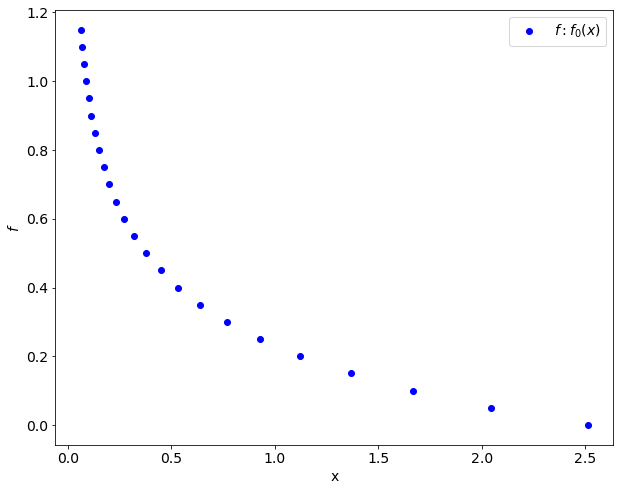

In [3]:
plt.plot(DATA_X, DATA_F, "bo", label="$f: f_0 (x)$")
plt.xlabel("x")
plt.ylabel("$f$")
plt.legend(loc="best")
plt.show()


Аппроксимируем функцию с помощью метода наименьших квадратов, используя модель с тремя экспонентами:
$$
f_3 (x) = \beta_1 e^{-\lambda_1 x} + \beta_2 e^{-\lambda_2 x} + \beta_3 e^{-\lambda_3 x}
$$

Функция ошибки в общем виде будет выглядеть следующим образом:
$$
E (\beta, \lambda) = \sum_{i} (f_0(x_i) - f_3(x_i))^2
$$

Попробуем использовать различные начальные приближения, чтобы определить то, которое даст наименьшую ошибку:

In [4]:
func = lambda x, b1, b2, b3, l1, l2, l3: b1 * np.exp(-l1 * x) + b2 * np.exp(-l2 * x) + b3 * np.exp(-l3 * x)
coef_initial_options = [
    (1., 1., 1., 1., 1., 1.),
    (-1., -1., -1., -1., -1., -1.),
    (1., 1., 1., -1., -1., -1.),
    (-1., -1., -1., 1., 1., 1.),
    (10., 10., 10., 10., 10., 10.),
    (-10., -10., -10., -10., -10., -10.),
    (10., 10., 10., -10., -10., -10.),
    (-10., -10., -10., 10., 10., 10.),
]
output_data = []
for coef_initial in coef_initial_options:
    coef_optimized, _ = curve_fit(func, DATA_X, DATA_F, p0=coef_initial)
    error = np.sum(np.square(func(DATA_X, *coef_optimized) - DATA_F))
    output_data.append({
        "coef_initial": coef_initial,
        "b1 opt": coef_optimized[0],
        "b2 opt": coef_optimized[1],
        "b3 opt": coef_optimized[2],
        "l1 opt": coef_optimized[3],
        "l2 opt": coef_optimized[4],
        "l3 opt": coef_optimized[5],
        "error": error,
    })
results = pd.DataFrame(output_data)
results


,coef_initial,b1 opt,b2 opt,b3 opt,l1 opt,l2 opt,l3 opt,error
0,"(1.0, 1.0, 1.0, 1.0, 1.0, 1.0)",0.404385,0.404382,0.872655,1.290601,1.290675,12.701374,0.001770
1,"(-1.0, -1.0, -1.0, -1.0, -1.0, -1.0)",0.703958,1.127692,0.785652,10.420237,47.902827,1.259862,0.001456
2,"(1.0, 1.0, 1.0, -1.0, -1.0, -1.0)",-5.417971,0.808775,6.290640,12.701514,1.290650,12.701555,0.001770
3,"(-1.0, -1.0, -1.0, 1.0, 1.0, 1.0)",0.868822,-0.000012,0.787819,12.013663,-3.165104,1.243079,0.000635
4,"(10.0, 10.0, 10.0, 10.0, 10.0, 10.0)",0.703915,1.127162,0.785647,10.419736,47.891126,1.259855,0.001456
5,"(-10.0, -10.0, -10.0, -10.0, -10.0, -10.0)",-11.060636,11.060614,0.000022,-9.510543,-9.510543,-9.573115,10.791718
6,"(10.0, 10.0, 10.0, -10.0, -10.0, -10.0)",5.594942,7.632684,-13.227626,-9.716435,-9.716581,-9.716519,10.792136
7,"(-10.0, -10.0, -10.0, 10.0, 10.0, 10.0)",2.687391,0.808772,-1.814727,12.702135,1.290646,12.702363,0.001770


Наименьшая ошибка достигается при следующих параметрах модели:

In [5]:
optima = results[results.error == results.error.min()].iloc[0]
coef_optimized = (optima["b1 opt"], optima["b2 opt"],optima["b3 opt"], optima["l1 opt"], optima["l2 opt"], optima["l3 opt"])
error = optima["error"]
print("Coefs:", coef_optimized)
print("Error:", error)


Coefs: (0.8688218142215282, -1.232058030034977e-05, 0.787819183701535, 12.013662841593645, -3.165103585170551, 1.2430785347066855)
Error: 0.0006347158380539779


На графике ниже можно наблюдать, как построенное приближение $f_3 (x)$ соотносится с исходной функцией $f_0 (x)$:

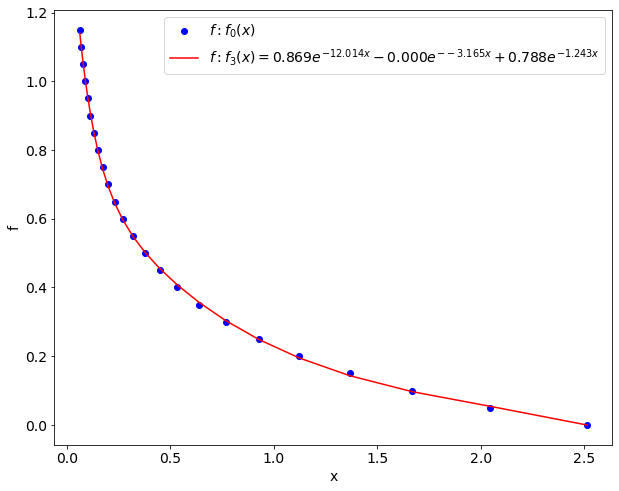

In [6]:
plt.plot(DATA_X, DATA_F, "bo", label="$f: f_0 (x)$")
plt.plot(DATA_X, func(DATA_X, *coef_optimized), "r",
         label="$f: f_3 (x) = %.3f e^{-%.3f x} %+.3f e^{-%.3f x} %+.3f e^{-%.3f x}$" % (coef_optimized[0], coef_optimized[3], coef_optimized[1], coef_optimized[4], coef_optimized[2], coef_optimized[5]))
plt.xlabel("x")
plt.ylabel("f")
plt.legend(loc="best")
plt.show()


Для той же модели, но с двумя экспонентами:
$$
f_2 (x) = \beta_1 e^{-\lambda_1 x} + \beta_2 e^{-\lambda_2 x}
$$


In [7]:
func = lambda x, b1, b2, l1, l2: b1 * np.exp(-l1 * x) + b2 * np.exp(-l2 * x)
coef_initial = (-1., -1., 1., 1.)
coef_optimized, _ = curve_fit(func, DATA_X, DATA_F, p0=coef_initial)
error = np.sum(np.square(func(DATA_X, *coef_optimized) - DATA_F))

print("Coefs:", coef_optimized)
print("Error:", error)


Coefs: [ 0.80877291  0.87266541  1.29064745 12.70171066]
Error: 0.0017697315712488528


На графике ниже можно наблюдать, как построенное приближение $f_2 (x)$ соотносится с исходной функцией $f_0 (x)$:

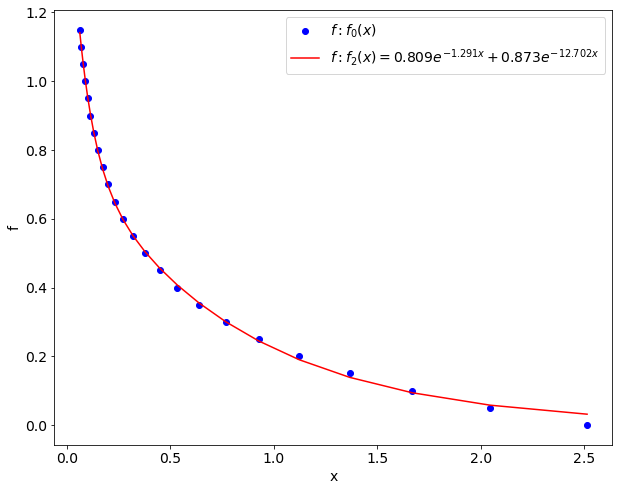

In [8]:
plt.plot(DATA_X, DATA_F, "bo", label="$f: f_0 (x)$")
plt.plot(DATA_X, func(DATA_X, *coef_optimized), "r",
         label="$f: f_2 (x) = %.3f e^{-%.3f x} %+.3f e^{-%.3f x}$" % (coef_optimized[0], coef_optimized[2], coef_optimized[1], coef_optimized[3]))
plt.xlabel("x")
plt.ylabel("f")
plt.legend(loc="best")
plt.show()


Наконец, для случая с одной экспонентой:
$$
f_1 (x) = \beta e^{-\lambda x}
$$

In [9]:
func = lambda x, b, l: b * np.exp(-l * x)
coef_initial = (-1., 1.)
coef_optimized, _ = curve_fit(func, DATA_X, DATA_F, p0=coef_initial)
error = np.sum(np.square(func(DATA_X, *coef_optimized) - DATA_F))

print("Coefs:", coef_optimized)
print("Error:", error)


Coefs: [1.1660128 2.0633445]
Error: 0.08678102497927023


На графике ниже можно наблюдать, как построенное приближение $f_1 (x)$ соотносится с исходной функцией $f_0 (x)$:

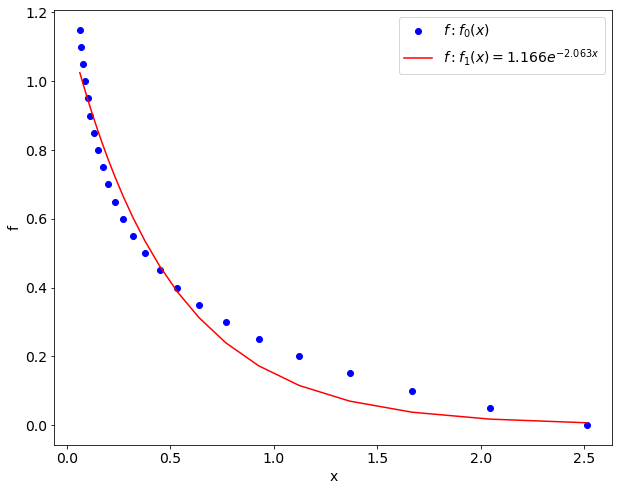

In [10]:
plt.plot(DATA_X, DATA_F, "bo", label="$f: f_0 (x)$")
plt.plot(DATA_X, func(DATA_X, *coef_optimized), "r",
         label="$f: f_1 (x) = %.3f e^{-%.3f x}$" % tuple(coef_optimized))
plt.xlabel("x")
plt.ylabel("f")
plt.legend(loc="best")
plt.show()


Сведение к линейной задаче ([референс](https://en.wikipedia.org/wiki/Non-linear_least_squares#Transformation_to_a_linear_model)):
$$
f(x) = \beta e^{-\lambda x} \\
\ln f(x) = \ln \beta e^{-\lambda x} \\
\ln f(x) = \ln \beta + \ln e^{-\lambda x} \\
\ln f(x) = \ln \beta - \lambda x \\
$$

Отсюда функция ошибки изменится следующим образом:
$$
E (\beta, \lambda) = \sum_{i} (\ln f_0(x_i) - \ln \beta + \lambda x_i)^2
$$

Логарифм от нуля не определен, поэтому предварительно избавимся от нулевого значения.

In [11]:
DATA_X = DATA_X[1:]
DATA_F = DATA_F[1:]

func = lambda x, b, l: np.exp(np.log(b) - l * x)
errf = lambda coef, x, f: (np.log(f) - np.log(coef[0]) + coef[1] * x)
coef_initial = (1., 1.)
coef_optimized, _ = leastsq(errf, coef_initial[:], args=(DATA_X, DATA_F))
error = np.sum(np.square(func(DATA_X, *coef_optimized) - DATA_F))

print("Coefs:", coef_optimized)
print("Error:", error)


Coefs: [1.00716684 1.46921498]
Error: 0.17344279071557395


На графике ниже можно наблюдать, как построенное приближение $f (x)$ соотносится с исходной функцией $f_0 (x)$:

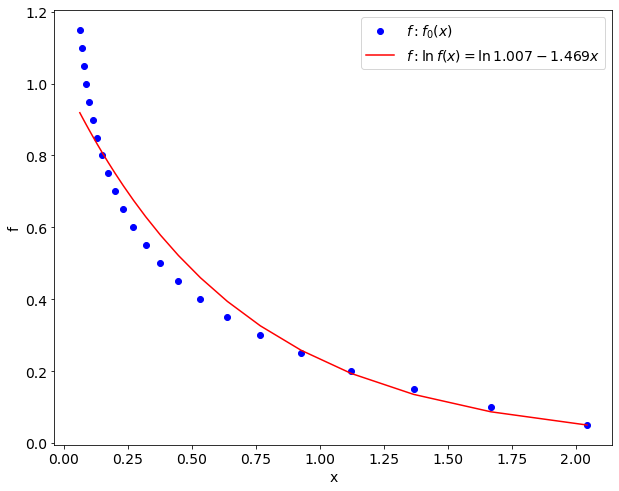

In [12]:
plt.plot(DATA_X, DATA_F, "bo", label="$f: f_0 (x)$")
plt.plot(DATA_X, func(DATA_X, *coef_optimized), "r", label="$f: \\ln f(x) = \\ln %.3f - %.3f x$" % tuple(coef_optimized))
plt.xlabel("x")
plt.ylabel("f")
plt.legend(loc="best")
plt.show()


Таким образом, наиболее точной оказалась аппроксимация исходной функции с помощью модели с тремя экспонентами. Лучшим начальным приближением стало то, в котором использовались отрицательные значения $\beta$ и положительные значения $\lambda$, поэтому таковые были использованы и в построении аппроксимаций с меньшим числом экспонент. Использование больших по модулю начальных приближений не дало уменьшения ошибки. С уменьшением числа параметров росла ошибка, причем наибольшей она стала после сведения экспоненциальной модели к линейной.